In [2]:
from scipy import signal as sg
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


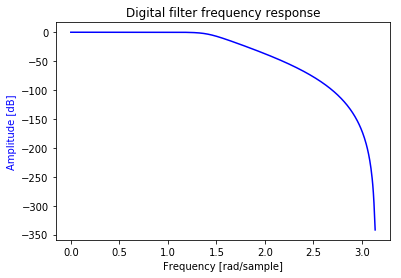

In [5]:
Fs = 100 ; ti = 0 ; tf = 1

t  =np.arange(ti, tf-1/Fs ,1/Fs)
freq  = ( np.arange(0, len(t) ,1) /len(t) -0.5 ) * Fs 

f1 = 30 ; A1 = 1 ;  phi1 = 0 
f2 = 510 ; A2 = 2 ;  phi2 = 0 

# Sinusoidal signal s(t) at continuous time : s12
s1 = A1 * np.sin( 2*np.pi*f1*t + phi1 ) 
s2 = A2 * np.sin( 2*np.pi*f2*t + phi2 ) 
s12 = s1 + s2 

# DFT calculation before the anti-aliasing filter
Xf_s12 = abs(np.fft.fftshift(np.fft.fft( s12 ))) 

Wp = 40/Fs 
Ws = 50/Fs 
[ N,Wn ] = sg.buttord( Wp , Ws , 0.5 , 10 ) 
[ b,a ] = sg.butter( N, Wn )
w, h = sg.freqz( b , a , 512 ) 

fig = plt.figure()
plt.title('Digital filter frequency response')
ax1 = fig.add_subplot(111)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

#Filtration of signal s12 by anti-aliasing filter
s12_filter = sg.lfilter(b,a,s12)

#Calculation of the DFT after filtering
Xf_s12_filter = abs(np.fft.fftshift(np.fft.fft( s12_filter ))) 

Text(0.5, 1.0, 'DFT')

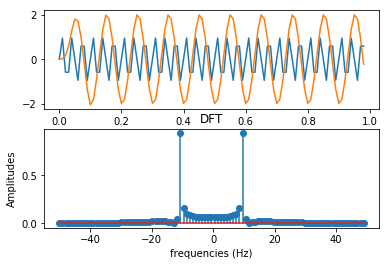

In [6]:

plt.subplot(211);
plt.plot(t,s1,t,s12_filter);
plt.subplot(212);
plt.stem(freq,Xf_s12_filter/len(t)) 
plt.xlabel('frequencies (Hz)') 
plt.ylabel('Amplitudes') 
plt.title('DFT')

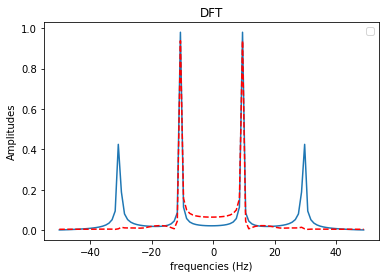

In [7]:
plt.figure, plt.plot(freq, Xf_s12/len(t)), plt.plot(freq, Xf_s12_filter/len(t),'--r')
plt.xlabel('frequencies (Hz)') 
plt.ylabel('Amplitudes') 
plt.title('DFT')
plt.legend('original', 'filtered')

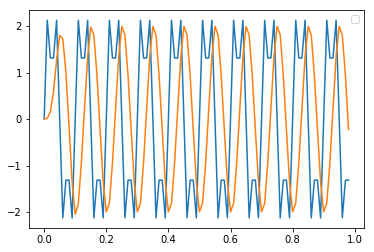

In [8]:
plt.figure
plt.plot(t,s12,t,s12_filter)
plt.legend('original', 'filtered')

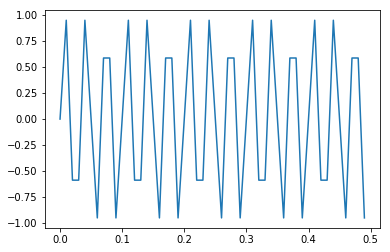

In [4]:
f1= 30
A1 = 1
phi1 = 0
Fs = 100.00
ti = 0
tf = 0.5
t = np.arange(ti,tf,1/Fs)
s_c1 = A1 * np.sin( 2*np.pi*f1*t + phi1 ) 
plt.plot(t,s_c1)


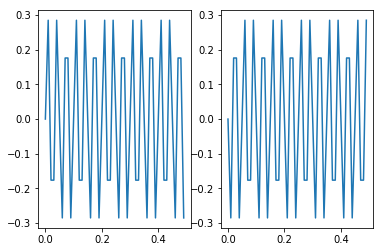

In [5]:
#%Amplitude change
A2 = 0.3
s_c2 = A2 * np.sin( 2*np.pi*f1*t + phi1 ) 
plt.subplot(121)
plt.plot(t,s_c2)
#%Phase change
phi2 = np.pi
s_c3 = A2 * np.sin( 2*np.pi*f1*t + phi2 ) 
plt.subplot(122)
plt.plot(t,s_c3)


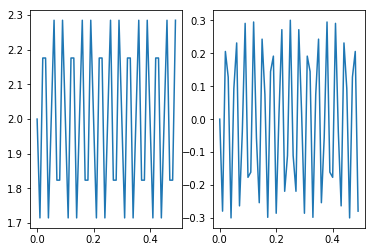

In [6]:
# Add mean value of 2V
s_c3_1 = s_c3 + 2
plt.subplot(121)
plt.plot(t,s_c3_1)
# frequency change
f2 = 31
s_c4 = A2 * np.sin( 2*np.pi*f2*t + phi2 ) 
plt.subplot(122)
plt.plot(t,s_c4)


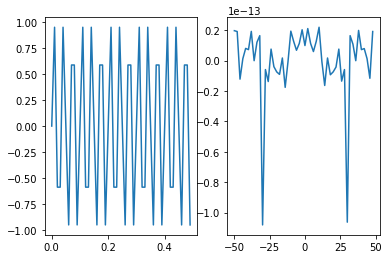

In [8]:
# Spectral representation of signal
plt.subplot(121)
plt.plot(t,s_c1) 
sfft = np.fft.fftshift(np.fft.fft(s_c1))
n = len(t)
freq = (np.arange(-n/2.0,n/2.0,1))*(Fs/n)
plt.subplot(122)
plt.plot(freq,sfft)

50


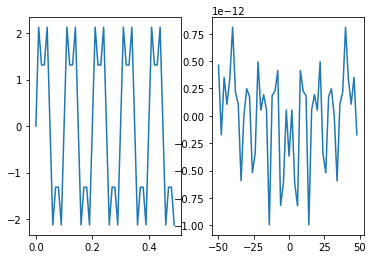

In [10]:
# Spectral representation of signal
f3 = 510
A3 = 2
phi3 = 0
s_c5 = A1 * np.sin( 2*np.pi*f1*t + phi1 )+A3 * np.sin( 2*np.pi*f3*t + phi3)
plt.subplot(121)
plt.plot(t,s_c5)
sfft = np.fft.fftshift(np.fft.fft(s_c5))
n = len(t)
freq = (np.arange(-n/2.0,n/2.0,1))*(Fs/n)
print(n)
plt.subplot(122)
plt.plot(freq,sfft)